In [6]:
import pandas as pd

In [5]:
# ! pip3 install pandas

In [7]:
# sharing for reference

import os

os.getcwd()

'/Users/shaq/Documents/LU/python_tech_basics/tech_basics_two/10Lecture/notebooks'

## Reading and "Manipulating" Data Frames

In [9]:
# we are reading the csv file located in our data folder
# the .. goes back a level

sample_data = pd.read_csv("../data/sample_data_cleaned.csv")

In [15]:
# previews the first five rows

sample_data.head()

,First Name,Last Name,Gender,Country,Age,Date,Id
0,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,Philip,Gent,Male,France,36,21/05/2015,2587
3,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,Nereida,Magwood,Female,United States,58,16/08/2016,2468


In [12]:
# checking the type of variable

type(sample_data)

pandas.core.frame.DataFrame

In [16]:
# check the size of the data
sample_data.shape

# 50 "customers" and 7 columns

(50, 7)

In [17]:
# check the structure
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  50 non-null     object
 1   Last Name   50 non-null     object
 2   Gender      50 non-null     object
 3   Country     50 non-null     object
 4   Age         50 non-null     int64 
 5   Date        50 non-null     object
 6   Id          50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


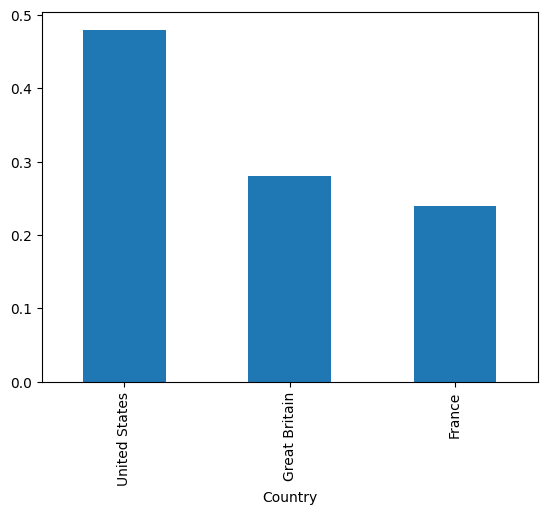

In [27]:
sample_data.Country.value_counts(normalize=True).plot(kind="bar");

In [22]:
# country distribution
# you can use the value counts function to identify the number of customers from different countroes
sample_data.Country.value_counts()

Country
United States    24
Great Britain    14
France           12
Name: count, dtype: int64

In [29]:
# question: what is the gender distribution
sample_data.Gender.value_counts()

Gender
Female    38
Male      12
Name: count, dtype: int64

In [31]:
# average age of the customer 

sample_data.Age.mean()

33.26

In [32]:
# summary statistics for the numerical columns

sample_data.describe()

,Age,Id
count,50.000000,50.000000
mean,33.260000,4717.720000
std,8.434163,2391.188783
min,21.000000,1258.000000
25%,26.250000,2603.750000
50%,32.000000,3574.000000
75%,37.750000,6536.250000
max,58.000000,9654.000000


In [37]:
# identify customers older than 50

sample_data[sample_data.Age > 50]

,First Name,Last Name,Gender,Country,Age,Date,Id
4,Nereida,Magwood,Female,United States,58,16/08/2016,2468
6,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
21,Holly,Eudy,Female,United States,52,16/08/2016,8561


In [39]:
# number of customers older than 50
# option 1 - use the shape and select the number of rows
sample_data[sample_data.Age > 50].shape[0]

3

In [40]:
# option 2 - use the len function
len(sample_data[sample_data.Age > 50])

3

In [44]:
# identify the first names of the customers older than 50

users_over_50 = list(sample_data[sample_data.Age > 50]["First Name"])
users_over_50

['Nereida', 'Etta', 'Holly']

In [49]:
# identify the youngest customer 

sample_data[sample_data.Age == sample_data.Age.min()]

,First Name,Last Name,Gender,Country,Age,Date,Id
24,Lester,Prothro,Male,France,21,15/10/2017,6574


In [50]:
# identify the Id of the youngest customer 

# option 1
sample_data[sample_data.Age == sample_data.Age.min()].Id

24    6574
Name: Id, dtype: int64

In [54]:
# you need to format the output as a list and then index the list to get the value

youngest_customer_id = list(sample_data[sample_data.Age == sample_data.Age.min()].Id)[0]
youngest_customer_id


6574

In [57]:
# option 2 - use brackets to select the Id column
youngest_customer_id = list(sample_data[sample_data.Age == sample_data.Age.min()]["Id"])[0]
youngest_customer_id

6574

## Writing Data

In [58]:
# create a dictionary

user_data = {
    "name": "Sarah",
    "user_id": "shaq"
}

In [59]:
# check the type of the variable

type(user_data)

dict

In [61]:
# for reference, what does the variable user_data contain

user_data

{'name': 'Sarah', 'user_id': 'shaq'}

In [63]:
# convert the dictionary into a data frame

user_data_transformed = pd.DataFrame([user_data])

In [64]:
# for reference, what does the variable user_data_transformed contain

user_data_transformed

,name,user_id
0,Sarah,shaq


In [66]:
type(user_data_transformed)

pandas.core.frame.DataFrame

In [68]:
# we add the file path where we want to store the data and index = False to avoid creating an inde column

user_data_transformed.to_csv("../data/user_data.csv", index=False)

In [69]:
# check by reading the data
check = pd.read_csv("../data/user_data.csv")
check

,name,user_id
0,Sarah,shaq


In [71]:
user_data_2 = {
    "name": "Bob",
    "user_id": "bm"
}

user_data2_transformed = pd.DataFrame([user_data_2])
user_data2_transformed

,name,user_id
0,Bob,bm


In [72]:
# THIS CODE WILL OVERWRITE MY CURRENT FILE

user_data2_transformed.to_csv("../data/user_data.csv", index=False)

In [73]:
# check by reading the data
check = pd.read_csv("../data/user_data.csv")
check

,name,user_id
0,Bob,bm


In [78]:
user_data_transformed.to_csv("../data/user_data.csv", index=False)

In [79]:
# check by reading the data
check = pd.read_csv("../data/user_data.csv")
check

,name,user_id
0,Sarah,shaq


In [80]:
user_data2_transformed.to_csv("../data/user_data.csv", index=False, mode="a", header=False)

In [81]:
# check by reading the data
check = pd.read_csv("../data/user_data.csv")
check

,name,user_id
0,Sarah,shaq
1,Bob,bm


In [82]:
# to append a user
user_data_2 = {
    "name": "Bob",
    "user_id": "bm"
}

user_data2_transformed = pd.DataFrame([user_data_2])
user_data2_transformed

,name,user_id
0,Bob,bm


In [ ]:
# write this to your csv file
# dont forget to add mode="a" and header=False

user_data2_transformed.to_csv("../data/user_data.csv", index=False, mode="a", header=False)

In [83]:
# check by reading the data
check = pd.read_csv("../data/user_data.csv")
check

,name,user_id
0,Sarah,shaq
1,Bob,bm


In [84]:
# to append a user
user_data_2 = {
    "name": "Jim",
    "user_id": "jm"
}

user_data2_transformed = pd.DataFrame([user_data_2])
user_data2_transformed.to_csv("../data/user_data.csv", index=False, mode="a", header=False)

In [85]:
# check by reading the data
check = pd.read_csv("../data/user_data.csv")
check

,name,user_id
0,Sarah,shaq
1,Bob,bm
2,Jim,jm
